# Solutions to homework 4, AY 204 (Stars)
### Lieke van Son 01 November 2020



In [708]:
## Imports and definition
import numpy as np
from astropy import constants as const
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.table import Table

proj_dir = "/Users/lieke/Dropbox/AY204_TF/HW/HW4/"
Data_dir = "/Users/lieke/surfdrive/Documents/MESAtestProjects/star_HW4/"
save_loc = proj_dir + '/hw4sol/plots/'

# # Use LaTeX in the plots
##PLOT setttings
fsize = 15
from matplotlib import rc
pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times'],'size'   : fsize})
plt.rcParams.update(pgf_with_rc_fonts)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,25,30,35
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize



In [709]:
#Using relationbeteen L, R and T
def const_Rlines(logT, logR):
    sigma = const.sigma_sb.to(u.Lsun * u.K**-4 *u.Rsun**-2)
    logL = np.log10(4 * np.pi* sigma.value ) +  2* logR +4*logT # 
    return logL

***
# Problem 1 Energy production in massive stars

In [710]:

#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0, Lfrac = True,
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = proj_dir + '/hw4sol/plots/'):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.69)
        hist = hist[ZAMS_i:]
    
        #Express the luminosity as a fraction of the total luminosity
        if Lfrac:
            print('making L frc', min(hist[colour_by]), max(hist[colour_by]))
            hist['L_frac'] = np.zeros(len(hist))
            hist['L_frac'] = (10**hist[colour_by])/(10**hist['log_L'])
            kleur = 'L_frac'
            
        ##plot lines
        scat = ax.scatter(hist['log_Teff'],  hist['log_L'] , label= hist_names[i],
                c = hist[kleur], vmin= VMIN, vmax = VMAX)
        ax.scatter(hist['log_Teff'][0],  hist['log_L'][0] , marker = '*') #log_Teff
        ax.text(hist['log_Teff'][0],  hist['log_L'][0] , hist_names[i], ha='right', va='top') #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist['log_Teff'])-2, max(hist['log_Teff'])+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-60, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    cb = fig.colorbar(scat, ax=ax)
    cb.set_label(colour_by.replace('_', ' '), size = 25)
    cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=20)
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
#     plt.legend( )
    plt.savefig(save_loc +'/HR_'+colour_by+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




In [711]:
histoy_list = [history15, history20, history30, history40, history60]
HistNameList   = ['15 M$_{\odot}$', '20 M$_{\odot}$', '30 M$_{\odot}$', '40 M$_{\odot}$', '60 M$_{\odot}$']
colors = plt.cm.plasma(np.linspace(0,1,4)) #3rd num is the number of colours Set2

## H, He and Z luminosity as a fraction of the total L

making L frc -6.645952595551663 4.7656566567592344
making L frc -3.1858708754538845 5.065865589579834
making L frc 1.4042067335425024 5.501281112937577
making L frc 4.373414097481557 5.7671827412813705
making L frc 4.656398832205388 8.052118581043713


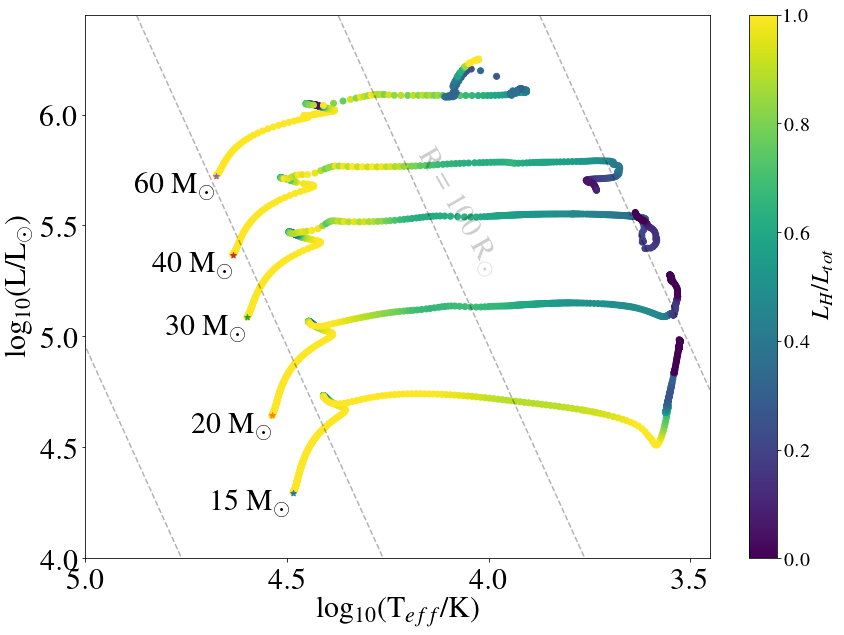

In [85]:
# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.45), VMIN =0, VMAX = 1, Lfrac = True,
           colour_by = 'log_LH', colour_label = '$L_{H}$/$L_{tot}$')


making L frc -29.074070900138054 5.628384168084629
making L frc -28.068566029896225 7.569505587762254
making L frc -26.850479198665255 8.420592075608694
making L frc -26.114112251887303 8.900166127344269
making L frc -25.22713928724684 9.540534417856833


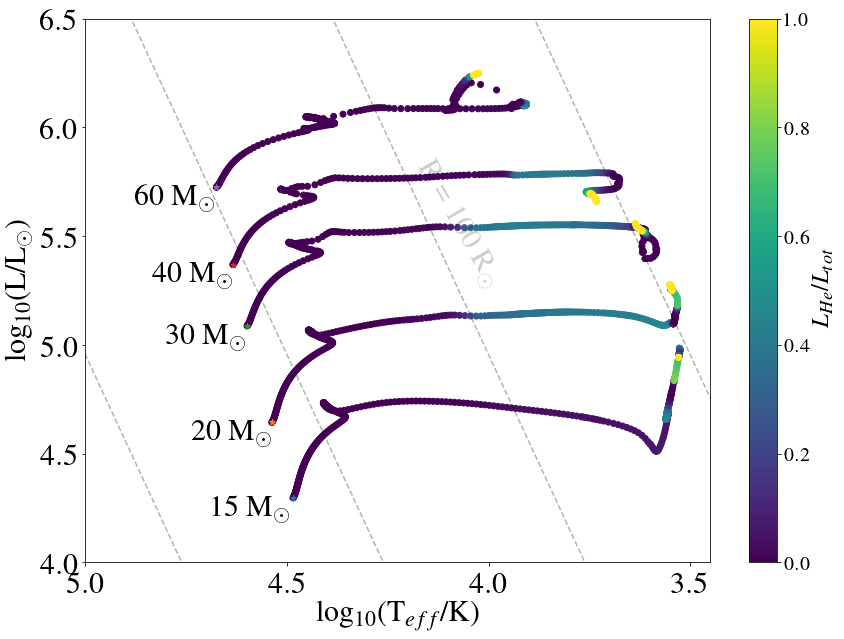

In [86]:
# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.5), VMIN =0, VMAX = 1, Lfrac = True,
           colour_by = 'log_LHe', colour_label = '$L_{He}$/$L_{tot}$')

making L frc -98.99999999999999 8.227629784377665
making L frc -98.99999999999999 8.734696063358445
making L frc -98.99999999999999 9.71397515879523
making L frc -98.99999999999999 10.208368634159818
making L frc -98.99999999999999 11.679350830830007


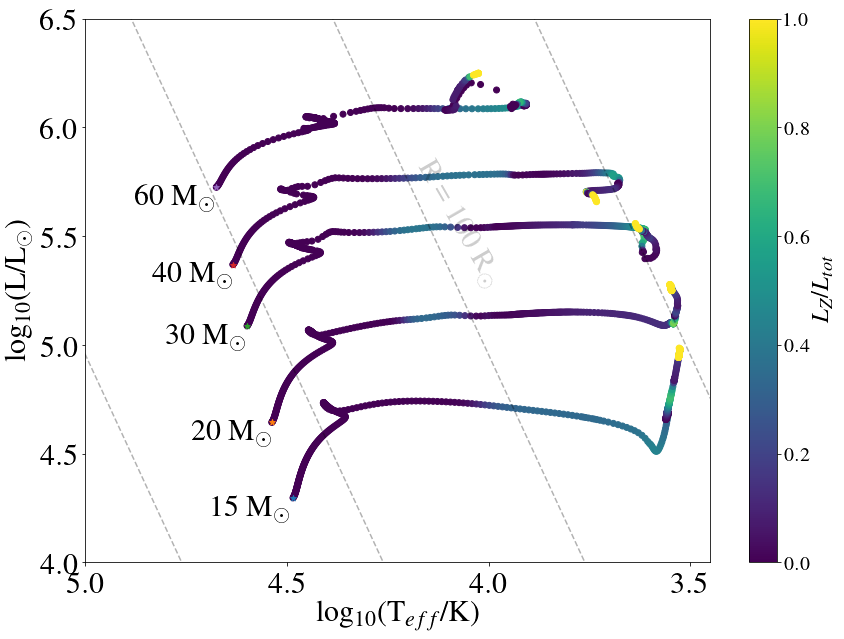

In [697]:
# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.5), VMIN =0, VMAX = 1, Lfrac = True,
           colour_by = 'log_LZ', colour_label = '$L_{Z}$/$L_{tot}$')


In [675]:
history15.info()

<Table length=844>
         name           dtype 
---------------------- -------
          model_number   int64
             num_zones   int64
              star_age float64
                log_dt float64
             star_mass float64
            log_xmstar float64
          log_abs_mdot float64
        mass_conv_core float64
          conv_mx1_top float64
          conv_mx1_bot float64
          conv_mx2_top float64
          conv_mx2_bot float64
               mx1_top float64
               mx1_bot float64
               mx2_top float64
               mx2_bot float64
                log_LH float64
               log_LHe float64
                log_LZ float64
              log_Lnuc float64
    log_Lnuc_sub_log_L float64
                    pp float64
                   cno float64
              tri_alfa float64
            epsnuc_M_1 float64
            epsnuc_M_2 float64
            epsnuc_M_3 float64
            epsnuc_M_4 float64
            epsnuc_M_5 float64
            epsnuc_M

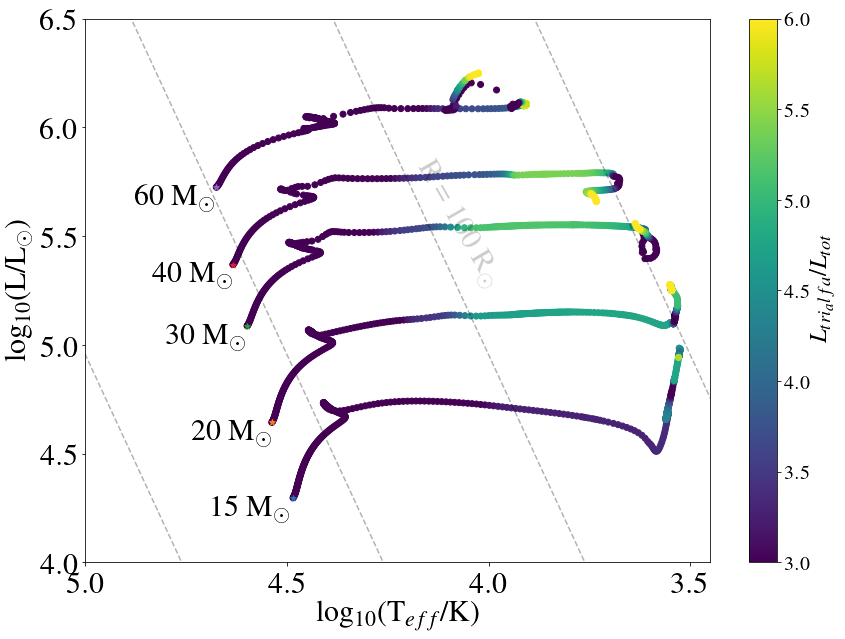

In [707]:
# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.5), VMIN =3, VMAX = 6, Lfrac = False,
           colour_by = 'log_LHe', colour_label = '$L_{tri_alfa}$/$L_{tot}$')

## Now we'll show it per dominating Luminosity

In [771]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
ColorSet = plt.cm.Set2(np.linspace(0,1,8)) #3rd num is the number of colours Set2
# colors = ColorSet[0:4]
colors = [ColorSet[0],ColorSet[1],ColorSet[3],ColorSet[2]] # switch last 2 colors
newcmp = ListedColormap(colors)

#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0, Ldominant = True,
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = proj_dir + '/hw4sol/plots/'):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.699)
        hist = hist[ZAMS_i:]
        #Express the luminosity as a fraction of the total luminosity
        if Ldominant:
            L_dominant = np.argmax([10**hist['log_LH']/10**hist['log_L'], 10**hist['log_LHe']/10**hist['log_L'],\
                                    10**hist['log_LZ']/10**hist['log_L'], np.full(len(hist),0.5) ], axis = 0 )
            hist['L_dominant'] = L_dominant
            kleur = 'L_dominant'
        ##plot lines
        scat = ax.scatter(hist['log_Teff'],  hist['log_L'] , label= hist_names[i],
                c = hist[kleur], vmin= VMIN, vmax = VMAX, cmap = newcmp)
        ax.scatter(hist['log_Teff'][0],  hist['log_L'][0] , marker = '*') #log_Teff
        ax.text(hist['log_Teff'][0],  hist['log_L'][0] , hist_names[i], ha='right', va='top') #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist['log_Teff'])-2, max(hist['log_Teff'])+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-60, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    c_ticks = ['$L_H$', '$L_{He}$', '$L_{Z}$', 'Not clear']
    cb = fig.colorbar(scat, ax=ax, ticks =range(4))
    #plt.clim(-0.5, 3 - 0.5) #set the tick labels in the middle, BEFORE changing labels! (done with vmin,vmax)
    cb.ax.set_yticklabels(c_ticks) 
#     cb.set_label(colour_by.replace('_', ' '), size = 25)
#     cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=25)
    
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
#     plt.legend( )
    plt.savefig(save_loc +'/HR_'+colour_by+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




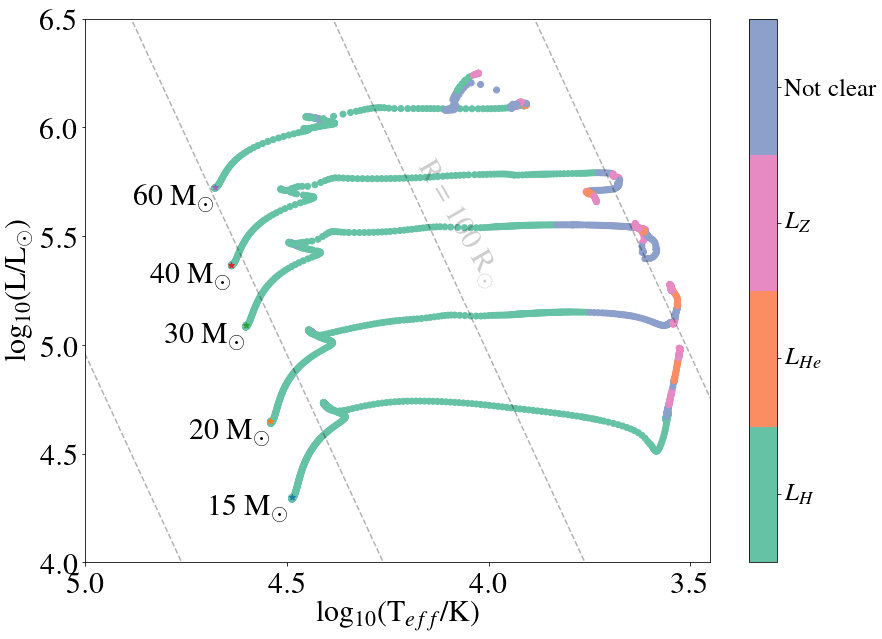

In [772]:
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.5), VMIN =-0.5, VMAX = 3.5, Ldominant = True,
           colour_by = 'L_dominant', colour_label = '$L_{Z}$/$L_{tot}$')

*** 
# Problem 2a Stellar winds

In [140]:
#read data
history15_Dutch = Table.read(proj_dir +'/hw4_models/M15_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history20_Dutch = Table.read(proj_dir +'/hw4_models/M20_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history30_Dutch = Table.read(proj_dir +'/hw4_models/M30_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history40_Dutch = Table.read(proj_dir +'/hw4_models/M40_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history60_Dutch = Table.read(proj_dir +'/hw4_models/M60_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')


history15_Dutch.info()



<Table length=838>
         name           dtype 
---------------------- -------
          model_number   int64
             num_zones   int64
              star_age float64
                log_dt float64
             star_mass float64
            log_xmstar float64
          log_abs_mdot float64
        mass_conv_core float64
          conv_mx1_top float64
          conv_mx1_bot float64
          conv_mx2_top float64
          conv_mx2_bot float64
               mx1_top float64
               mx1_bot float64
               mx2_top float64
               mx2_bot float64
                log_LH float64
               log_LHe float64
                log_LZ float64
              log_Lnuc float64
    log_Lnuc_sub_log_L float64
                    pp float64
                   cno float64
              tri_alfa float64
            epsnuc_M_1 float64
            epsnuc_M_2 float64
            epsnuc_M_3 float64
            epsnuc_M_4 float64
            epsnuc_M_5 float64
            epsnuc_M

In [245]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = plt.cm.plasma(np.linspace(0,1,15)) #3rd num is the number of colours Set2
newcmp = ListedColormap(colors)


#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0, 
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = proj_dir + '/hw4sol/plots/',
              label_list = ['None']):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.69)
        hist = hist[ZAMS_i:]
    
        ##plot lines
        if i == 0:
            scat = ax.scatter(hist['log_Teff'],  hist['log_L'] , label= label_list[i],
                    c = hist[kleur], vmin= VMIN, vmax = VMAX, cmap = newcmp, zorder = 20)
            ax.scatter(hist['log_Teff'][0],  hist['log_L'][0] , marker = '*') #log_Teff
            ax.text(hist['log_Teff'][0],  hist['log_L'][0] , np.str(np.round(hist['star_mass'][0],0))+'M$_{\odot}$' , ha='right', va='top') #log_Teff
        else: #for no winds
            ax.plot(hist['log_Teff'],  hist['log_L'], label= label_list[i],
                    color = 'grey', lw = 7,ls='--', zorder=21, alpha = 0.75) #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist['log_Teff'])-2, max(hist['log_Teff'])+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-80, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    cb = fig.colorbar(scat, ax=ax)
    cb.set_label(colour_by.replace('_', ' '), size = 25)
    cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=25)
    
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
    plt.legend(loc = 'upper left')
    plt.savefig(save_loc +'/HR_'+colour_by+np.str(np.round(hist['star_mass'][0],0))+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




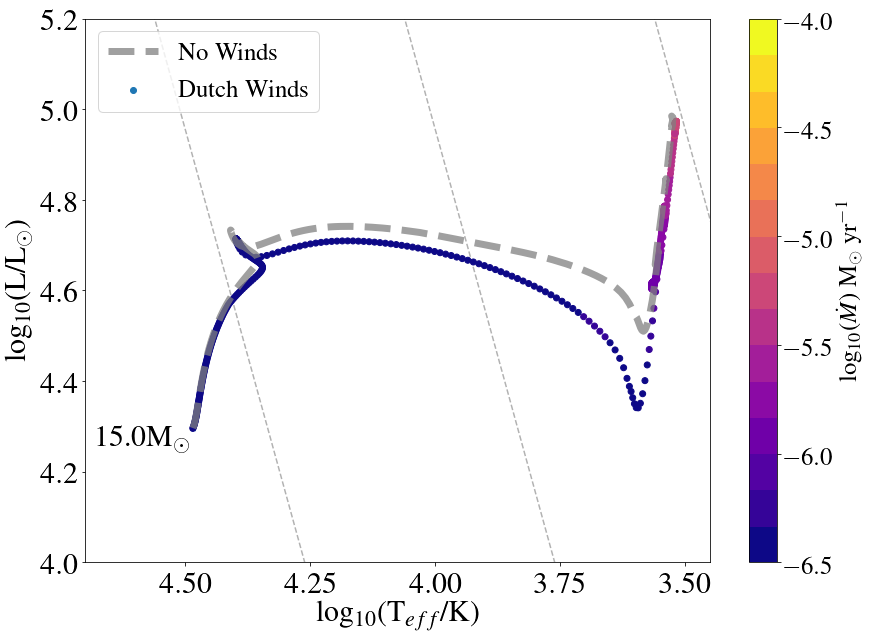

In [246]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history15_Dutch, history15], xlim = (3.45,4.7), ylim= (4.,5.2), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)



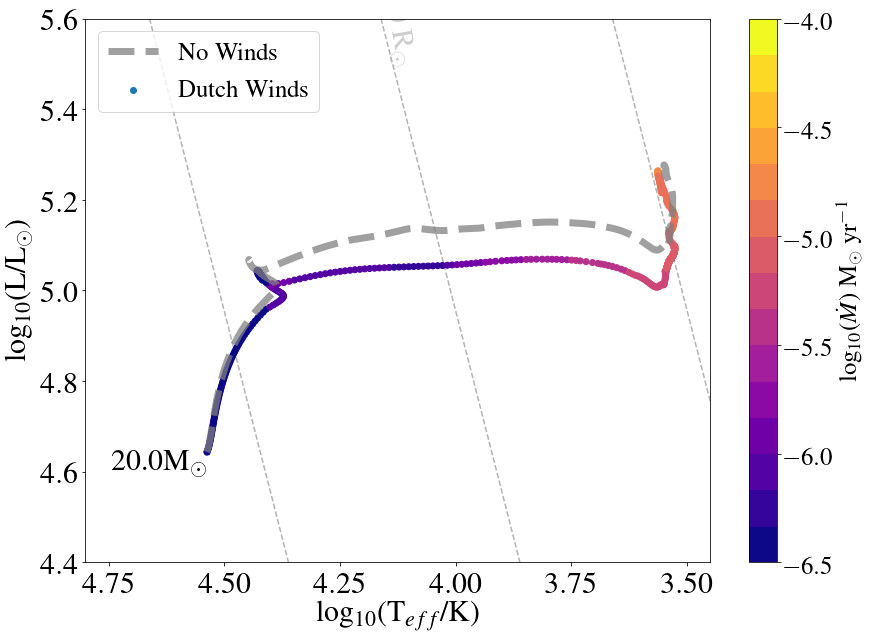

In [247]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history20_Dutch, history20], xlim = (3.45,4.8), ylim= (4.4,5.6), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)


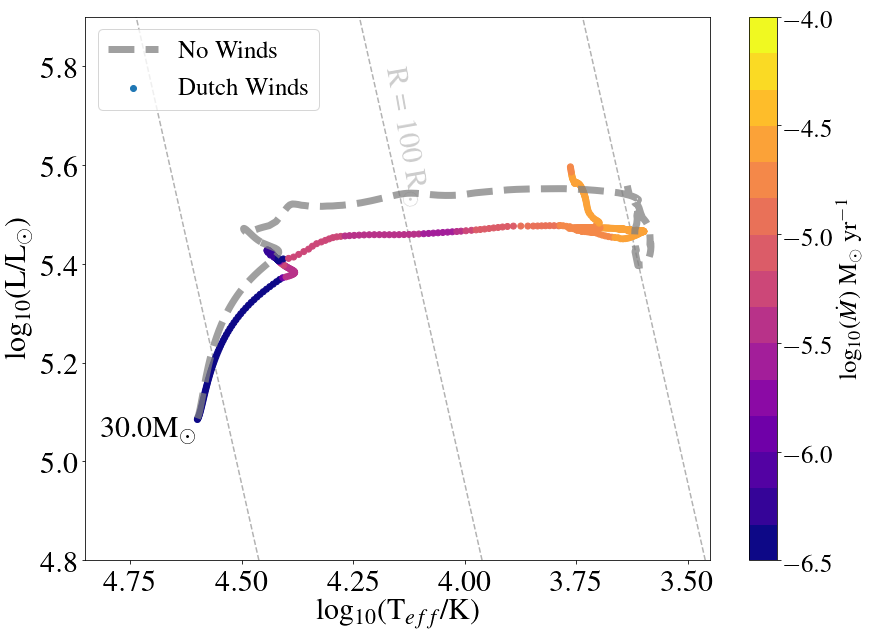

In [248]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history30_Dutch, history30], xlim = (3.45,4.85), ylim= (4.8,5.9), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)


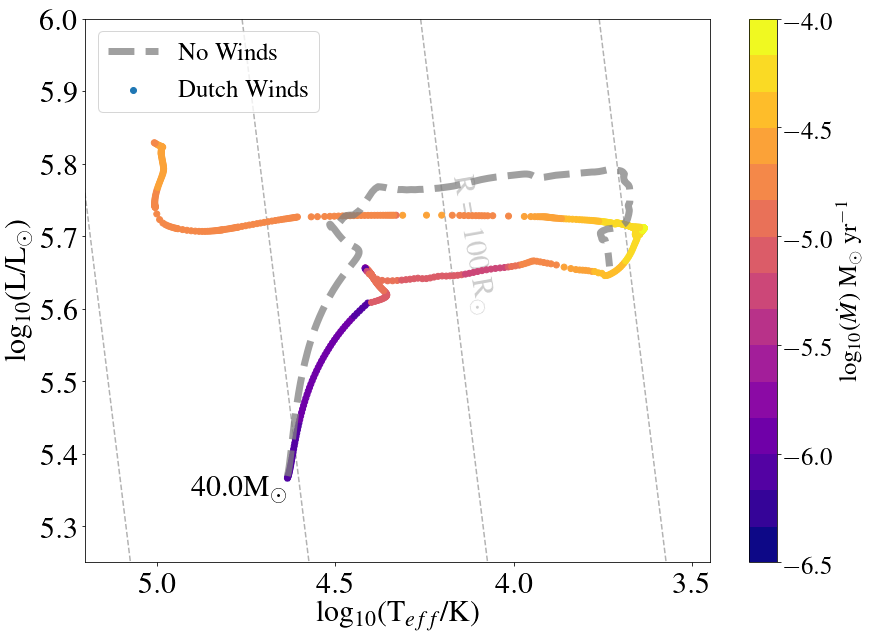

In [249]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history40_Dutch, history40], xlim = (3.45,5.2), ylim= (5.25,6.0), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)


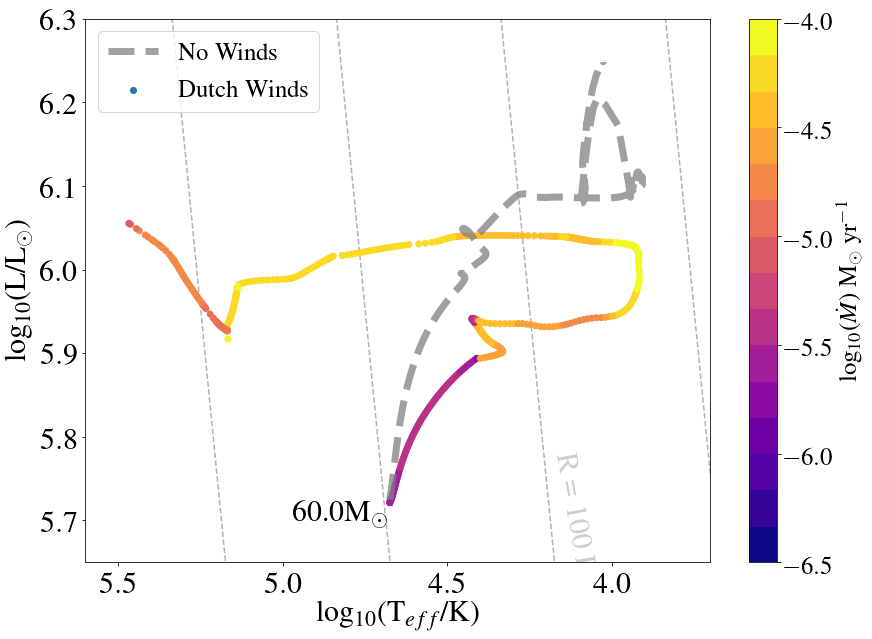

In [250]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history60_Dutch, history60], xlim = (3.7,5.6), ylim= (5.65,6.3), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)


# Problem 2b Surface abundances

In [404]:
history60_Dutch.info()

<Table length=763>
         name           dtype 
---------------------- -------
          model_number   int64
             num_zones   int64
              star_age float64
                log_dt float64
             star_mass float64
            log_xmstar float64
          log_abs_mdot float64
        mass_conv_core float64
          conv_mx1_top float64
          conv_mx1_bot float64
          conv_mx2_top float64
          conv_mx2_bot float64
               mx1_top float64
               mx1_bot float64
               mx2_top float64
               mx2_bot float64
                log_LH float64
               log_LHe float64
                log_LZ float64
              log_Lnuc float64
    log_Lnuc_sub_log_L float64
                    pp float64
                   cno float64
              tri_alfa float64
            epsnuc_M_1 float64
            epsnuc_M_2 float64
            epsnuc_M_3 float64
            epsnuc_M_4 float64
            epsnuc_M_5 float64
            epsnuc_M

In [413]:
def plot_abundance_time(histoy_list, abund = 'surface_he4', ylab = 'He 4'):
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.69)
        hist = hist[ZAMS_i:]
        
        plt.plot(hist['star_age']/hist['star_age'][-1], hist[abund], 
                 label = np.str(np.round(hist['star_mass'][0],0))+'M$_{\odot}$')

    # Plot values
    ax.set_xlabel('fraction of star age to $^{12}$C exhaustion')
    ax.set_ylabel('surface abundance ' + ylab)
    plt.tick_params(axis='both', which='major')
    plt.xlim(0.8, 1.0)
#     plt.ylim(ylim)
    plt.yscale('log')

    plt.legend( )
    plt.savefig(save_loc +'/surfaceAbund'+abund+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()


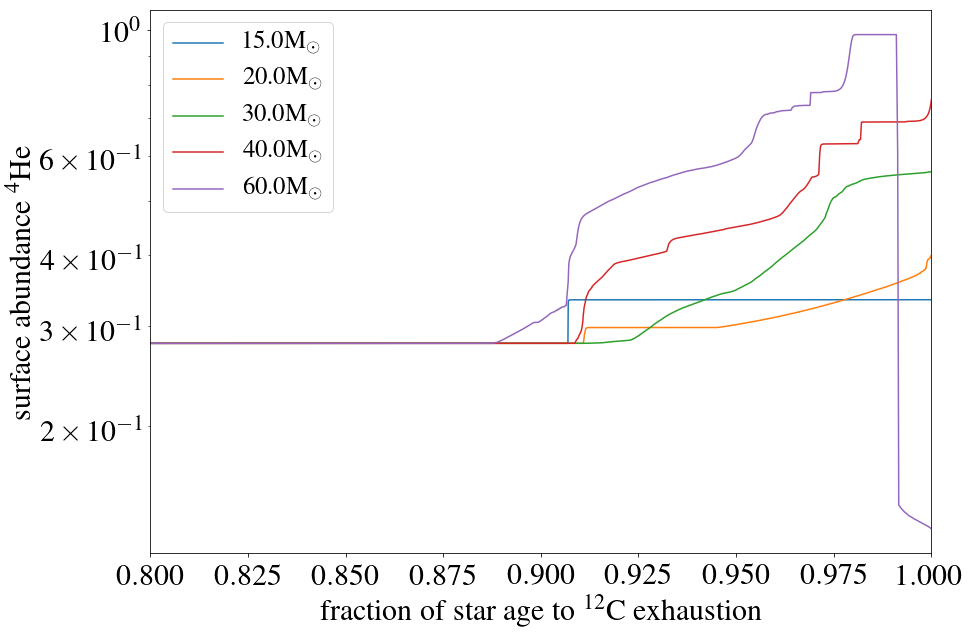

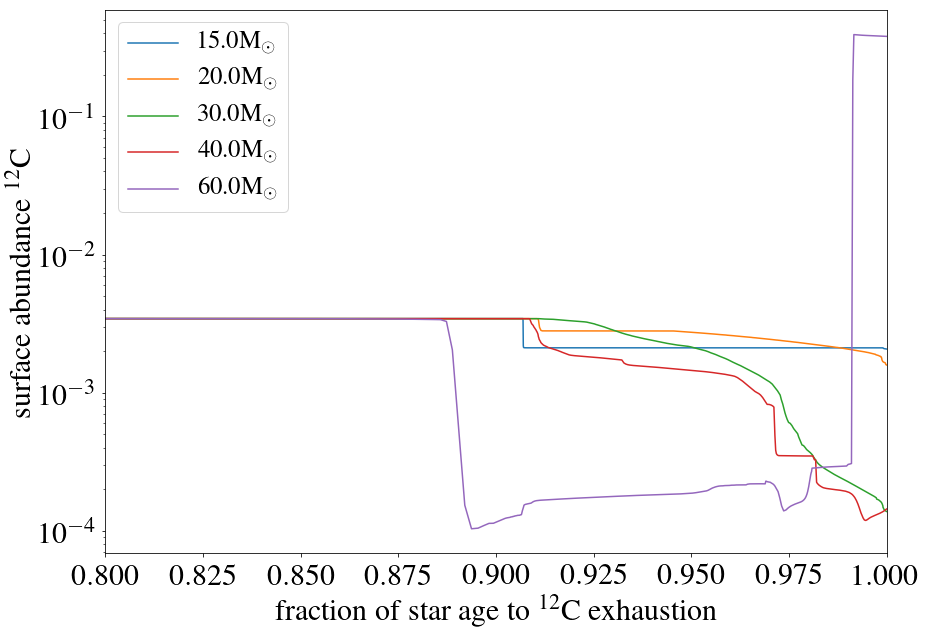

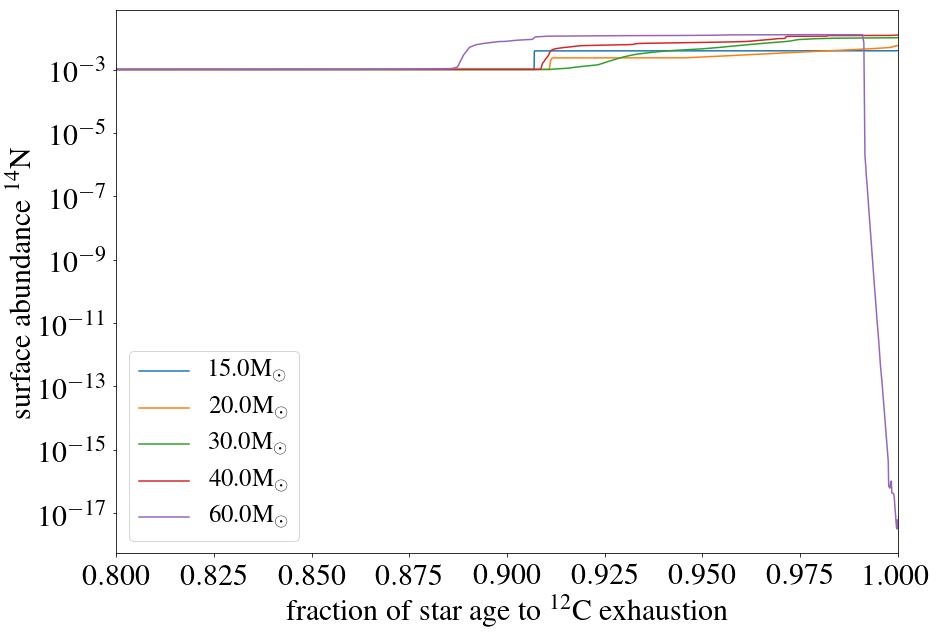

In [412]:
plot_abundance_time(histoy_list, abund = 'surface_he4', ylab = '$^{4}$He')
plot_abundance_time(histoy_list, abund = 'surface_c12', ylab = '$^{12}$C')
plot_abundance_time(histoy_list, abund = 'surface_n14', ylab = '$^{14}$N')

In [400]:

#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0,
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = proj_dir + '/hw4sol/plots/'):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.69)
        hist = hist[ZAMS_i:]
        
        #Extra column
        hist['N_C'] = hist['surface_n14']/hist['surface_c12']
            
        ##plot lines
        scat = ax.scatter(hist['log_Teff'],  hist['log_L'] , label= hist_names[i],
                c = hist[kleur], vmin= VMIN, vmax = VMAX)
        ax.scatter(hist['log_Teff'][0],  hist['log_L'][0] , marker = '*') #log_Teff
        ax.text(hist['log_Teff'][0],  hist['log_L'][0] , hist_names[i], ha='right', va='top') #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist['log_Teff'])-2, max(hist['log_Teff'])+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-60, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    cb = fig.colorbar(scat, ax=ax)
    cb.set_label(colour_by.replace('_', ' '), size = 25)
    cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=20)
    
    # Show WR region
    WR_i1 = next(ind for ind,x in enumerate(history40_Dutch['surface_h1']) if x < 0.3)
    WR_i2 = next(ind for ind,x in enumerate(history60_Dutch['surface_h1']) if x < 0.3)
    T_array = np.linspace(history40_Dutch['log_Teff'][WR_i1]+0.05, 4., num =50)

    dx = history40_Dutch['log_Teff'][WR_i1] - history60_Dutch['log_Teff'][WR_i2]
    dy = history40_Dutch['log_L'][WR_i1] - history60_Dutch['log_L'][WR_i2]
    y_line = (dy/dx)*T_array + 16
    plt.plot(T_array, y_line , c = 'pink')
    plt.fill_between(x = T_array, y1 =y_line, y2 = 7,zorder = 0,
                     color='r',alpha=0.1,edgecolor='blue',hatch='/', lw = 0)
    plt.fill_between(x = np.linspace(6,history40_Dutch['log_Teff'][WR_i1]+0.05),zorder = 0,
                     y1 =y_line[0], y2 = 7,color='r',alpha=0.1,edgecolor='blue',hatch='/', lw = 0.0)
    
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
#     plt.legend( )
    plt.savefig(save_loc +'/HR_'+colour_by+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




In [401]:
histoy_list = [history15_Dutch, history20_Dutch, history30_Dutch, history40_Dutch, history60_Dutch]
HistNameList   = ['15 M$_{\odot}$', '20 M$_{\odot}$', '30 M$_{\odot}$', '40 M$_{\odot}$', '60 M$_{\odot}$']
colors = plt.cm.plasma(np.linspace(0,1,4)) #3rd num is the number of colours Set2

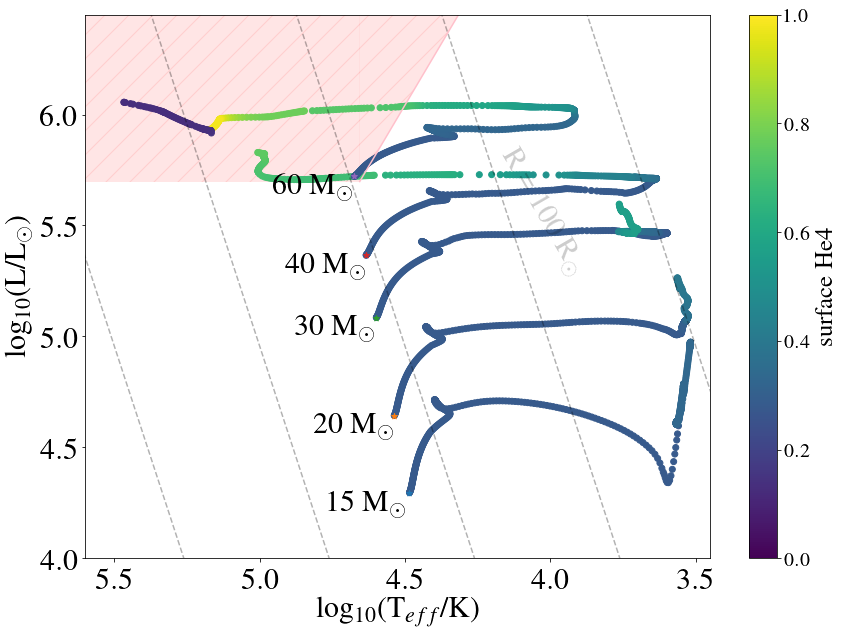

In [402]:
# He
HR_diagram(histoy_list, xlim = (3.45,5.6), ylim= (4.,6.45), VMIN =0, VMAX = 1,
           colour_by = 'surface_he4', colour_label = 'surface He4')

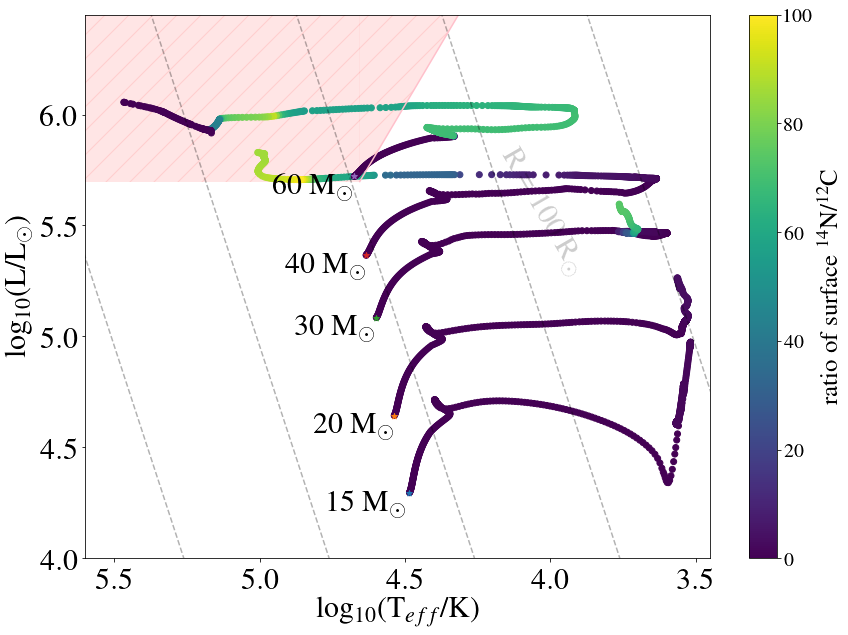

In [403]:
# ratio Nitrogen over Carbon
HR_diagram(histoy_list, xlim = (3.45,5.6), ylim= (4.,6.45), VMIN =0, VMAX = 100,
           colour_by = 'N_C', colour_label = 'ratio of surface $^{14}$N/$^{12}$C')

# surface_h1 < 0.3


***
# Problem 3

The question is, what is the probability a star will have interacted with a companion, at each point of the stars' evolution?

This is the same as asking, "What is the probability that R_* = R_RL?". 
Now R_* changes over the evolution of the star, and so does it's mass, so the RL radius also changes.

From Eggletton:

\begin{equation}
R_{RL,1} = a \frac{0.49 x^{2/3}}{0.6 x^{2/3} + ln(1 + x^{1/3})}
\end{equation}
with $x \equiv q^{-1} \equiv m_2/m_1$

lets call 
\begin{equation}
f_{eggle}(q) \equiv \frac{0.49 x^{2/3}}{0.6 x^{2/3} + ln(1 + x^{1/3})}
\end{equation}

Using Kepler we can re-write the RL radius to


\begin{equation}
R_{RL,1} = \left( P^2 \frac{G m_1(1+q)}{(2\pi)^2} \right)^{1/3} f_{eggle}(q)
\end{equation}


So given a mass ratio q, we can calculate the required period for $R_*$ to be $R_{RL}$

\begin{equation}
\label{eq:PRL}
 P_{RL}   = \left[  \frac{(2\pi)^2}{G m_1(1+q)} \left(\frac{R_{RL,1}}{f_{eggle}(q)}\right)^{3} \right]^{1/2}
\end{equation}

Since we now have the period required for RLOF ($P_{RL}$) as a function of the mass ratio, we can calculate the required period over a range of mass ratio's. You should make sure that you exclude 'non-physical' periods, i.e. $P_{RL}$ outside of our allowed period regime $0.15 < \log P_{RL}< 3.5$.

With this we can calulate the probabiliity (Prob(P,q), see below) for each $P_{RL}(q)$ combination. Integrating the probability over our range of mass ratios, leads to the total probability of being born as an interacting system for each P and q combination. 


***
Now we are told that the initial mass ratio distribution is flat:

\begin{equation}
f_{q} = q^0 = 1
\end{equation}
with $0.1<q<1.0$

the initial period distribution 
\begin{equation}
f_{\log P} = \log P^{-0.5}
\end{equation}
with $0.15 < \log P< 3.5$

and the binary fraction is $f_{bin} = 0.7$

The fraction of systems with a certain logP or lower is thus
\begin{equation}
Prob(\log P) = \frac{ \int_{0.15}^{logP} (\log P)^{-0.5} }{\int_{0.15}^{3.5} (\log P)^{-0.5}}
\end{equation}

\begin{equation}
Prob(\log P) = \frac{ (\log P)^{0.5} - 0.15^{0.5} }{ 3.5^{0.5} - 0.15^{0.5} }
\end{equation}

similar but easier for q, but here we need some q or higher:

\begin{equation}
Prob(q) = \frac{ 1-q }{ 0.9 }
\end{equation}


The total probability of a certain configuration is thus:

\begin{equation}
Prob(\log P, q, f_{bin}) = Prob(q) \cdot Prob(\log P) \cdot f_{bin}
\end{equation}


So using all this we will calculate, for each mass ratio, the required period $P_{RL}$ (\ref{eq:PRL}) and corresponding probability to form such a system .

Since everything is a function of the mass ratio now, you would expect that you only have to find the minimum q that satisfies your condition, and integrate from that q to max q = 1. However, it's a little more complicated because te $P_{RL}$ increases as a function of mass ratio, and we said we need a certain P or lower. 
This effects small radii in particular.

The easiest solution to this is to just calculate the probabilities for a range of q, and then take the max value.



In [712]:
def f_eggleton(q=1):
    x = 1./q
    f_egg = (0.49*x**(2/3) )/(0.6 * x**(2/3) + np.log(1 + x**(1/3)) )
    return f_egg
    

def P_RL(m1=1*u.Msun, q=1, R =1*u.Rsun):
    m1 = m1.to(u.kg)
    R  = R.to(u.m)
    f_egg = f_eggleton(q=q)
    
    A = (2*np.pi)**2/(const.G * m1*(1 + q))
    B = (R/f_egg)**3
    Period = (A*B)**0.5
    return Period.to(u.day)


def Prob(P=100,q=1, fbin=0.7 ):
    """this assumes 0.15 < log P <3.5 in days and 
    mass ratio 0.1 < q = m2/m1 < 1.0 """
#     logP = np.log10(P)
#     P_P = ((logP)**0.5 - 0.15**0.5)/(3.5**0.5 - 0.15**0.5)
    lnP = np.log(P)
    P_P = (np.sqrt(lnP) - np.sqrt(np.log(10**0.15)) )/( np.sqrt(np.log(10**3.5) ) - np.sqrt(np.log(10**0.15) ) )
    P_q = (1. -q)/0.9
    return fbin * P_P * P_q 
    


/Users/lieke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/Users/lieke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/lieke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/lieke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tu

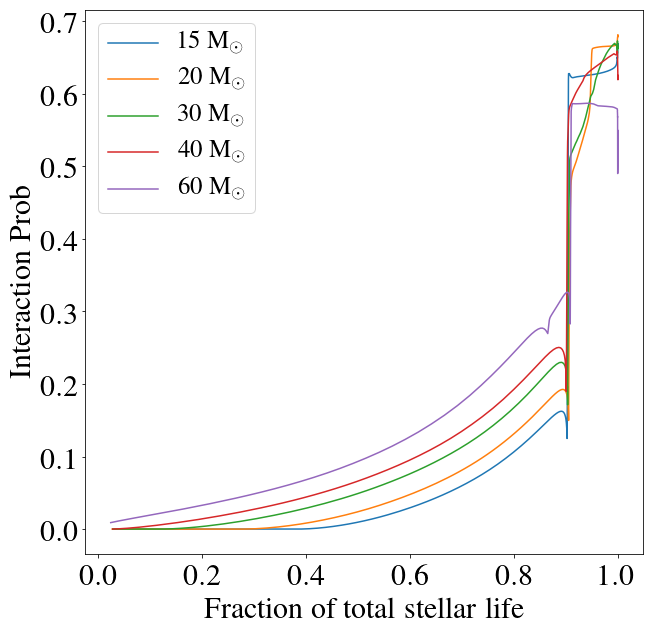

In [774]:
histoy_list = [history15_Dutch, history20_Dutch, history30_Dutch, history40_Dutch, history60_Dutch]
histoy_list = [history15, history20, history30, history40, history60]
label_list  = ['15 M$_{\odot}$', '20 M$_{\odot}$', '30 M$_{\odot}$', '40 M$_{\odot}$', '60 M$_{\odot}$']


fig, ax = plt.subplots(figsize = (10,10))
for i, table in enumerate(histoy_list):
    # Cut off pre-MS
    ZAMS_i = next(ind for ind,x in enumerate(table['center_h1']) if x < 0.69)
    table = table[ZAMS_i:]

    radii = 10**table['log_R']
    masses = table['star_mass']
    mass_ratios = np.linspace(0.1, 1.0, 100)

    interaction_prob = []
    summed_prob = []
    max_prob = []
    prob_minq_list = []
    for j in range(len(table)):
        # Calculate RLOF values of P
        P_res=P_RL(m1=masses[j]*u.Msun, q=mass_ratios, R =radii[j]*u.Rsun)
#         print('P_res', P_res, np.log10(P_res.value))
        #Rescrict to P values that fall within our birth population
        good_Ps = np.logical_and(np.log10(P_res.value) > 0.15, np.log10(P_res.value) < 3.5)

        #for all q's
        probabilities = Prob(P=P_res.value, q=mass_ratios, fbin=0.7 )
        
        if len(P_res[good_Ps]) >0:

            # As a function of min q
            min_required_q = min(mass_ratios[good_Ps])
            min_q_i = np.where(mass_ratios == min_required_q)
            prob_min_q = Prob(P=P_res[min_q_i].value, q=mass_ratios[min_q_i], fbin=0.7 )
#             print('min q: log Period', np.log10(P_res[min_q_i].value), 'q', mass_ratios[min_q_i], 'prob_min_q', prob_min_q)
            prob_minq_list.append(prob_min_q)
            
            # Integrating or summing over all probs
            integrated_P = np.trapz(probabilities[[good_Ps]], mass_ratios[good_Ps])
            interaction_prob.append(integrated_P)
            summed_prob.append(np.sum(probabilities[[good_Ps]]))
            
            #Using the maximum probability
            max_probal = max(probabilities[[good_Ps]])
            max_prob_i = np.where(probabilities == max_probal)
#             print('max prob: log Period', np.log10(P_res[max_prob_i].value), 'q', mass_ratios[max_prob_i], 'max_probal', max_probal)
            max_prob.append(max(probabilities[[good_Ps]]))
        else:
            interaction_prob.append(0)
            summed_prob.append(0)
            max_prob.append(0)
            prob_minq_list.append(0)
            
    histoy_list[i]['Prob']          = np.zeros(len(histoy_list[i]))
    histoy_list[i]['Prob'][ZAMS_i:] = max_prob#interaction_prob
#     plt.plot(table['star_age']/table['star_age'][-1], interaction_prob, label = label_list[i])
#     plt.plot(table['star_age']/table['star_age'][-1], np.array(summed_prob)*0.009, label = label_list[i], linestyle = '--')
    plt.plot(table['star_age']/table['star_age'][-1], max_prob, label = label_list[i], linestyle = '-')#, color = 'green')
#     plt.scatter(table['star_age']/table['star_age'][-1], prob_minq_list, label = label_list[i], linestyle = '-.', color = 'red')
#     plt.plot(table['star_age']/table['star_age'][-1], prob_maxP_list, label = label_list[i], linestyle = ':', color = 'blue')
    
plt.xlabel('Fraction of total stellar life')
plt.ylabel('Interaction Prob')
plt.legend()
plt.savefig(save_loc +'/InteractionProb.png', bbox_inches='tight')    

plt.show()

    

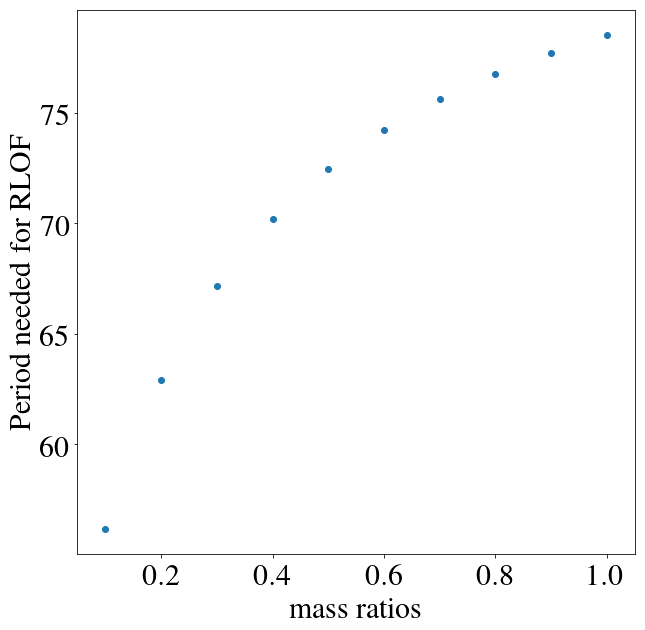

In [658]:
###########################################
# Let's plot the period versus the mass ratio
fig, ax = plt.subplots(figsize = (10,10))
mass_ratios = np.linspace(0.1, 1.0, 10)

ax.scatter(mass_ratios, P_RL(m1= 20*u.Msun, q=mass_ratios, R =100*u.Rsun) ) 
ax.set_xlabel('mass ratios')
ax.set_ylabel('Period needed for RLOF')
plt.show()


In [786]:

#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0,
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = proj_dir + '/hw4sol/plots/'):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(10,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.69)
        hist = hist[ZAMS_i:]
        
        hist['logprob'] = np.log10(hist['Prob'])
        ##plot lines
        scat = ax.scatter(hist['log_Teff'],  hist['log_L'] , label= hist_names[i],
                c = hist[kleur], vmin= VMIN, vmax = VMAX, cmap = 'rainbow')
        ax.scatter(hist['log_Teff'][0],  hist['log_L'][0] , marker = '*') #log_Teff
        ax.text(hist['log_Teff'][0],  hist['log_L'][0] , hist_names[i], ha='right', va='top') #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist['log_Teff'])-2, max(hist['log_Teff'])+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-60, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    cb = fig.colorbar(scat, ax=ax)
    cb.set_label(colour_by.replace('_', ' '), size = 25)
    cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=20)
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
#     plt.legend( )
    plt.savefig(save_loc +'/HR_'+colour_by+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




/Users/lieke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


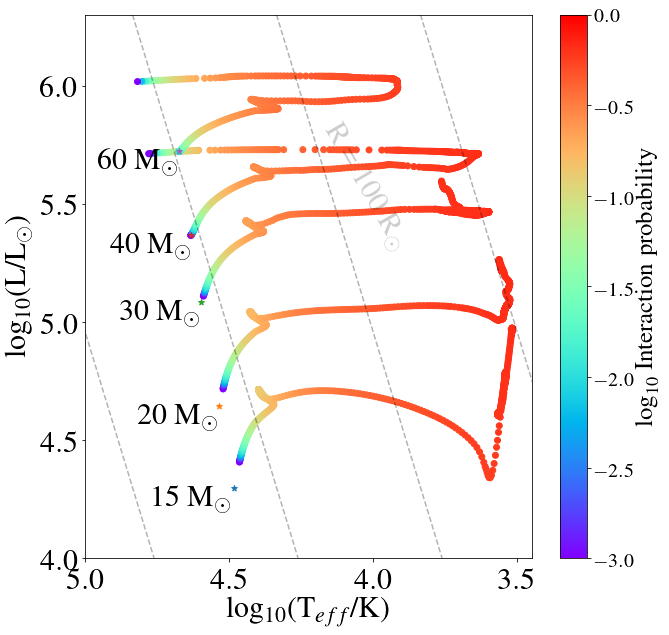

In [787]:
histoy_list = [history15_Dutch, history20_Dutch, history30_Dutch, history40_Dutch, history60_Dutch]
# histoy_list = [history15, history20, history30, history40, history60]
label_list  = ['15 M$_{\odot}$', '20 M$_{\odot}$', '30 M$_{\odot}$', '40 M$_{\odot}$', '60 M$_{\odot}$']


HistNameList   = ['15 M$_{\odot}$', '20 M$_{\odot}$', '30 M$_{\odot}$', '40 M$_{\odot}$', '60 M$_{\odot}$']
colors = plt.cm.plasma(np.linspace(0,1,4)) #3rd num is the number of colours Set2

# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.3), VMIN =-3, VMAX = 0., 
           colour_by = 'logprob', colour_label = '$\log_{10}$ Interaction probability')


***
***

# some extra plots to understand the shape of the probability functions

***
***


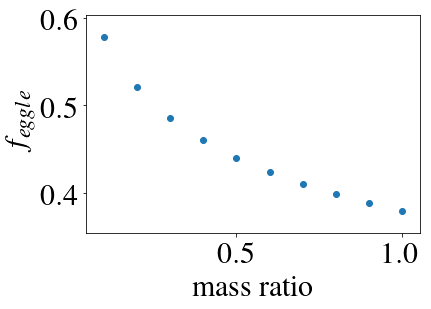

In [432]:
#Let's look at the behaviour of F_eggle for a bit
mass_ratios = np.linspace(0.1, 1.0, 10)
plt.scatter(mass_ratios, f_eggleton(q=mass_ratios) )
plt.xlabel('mass ratio')
plt.ylabel('$f_{eggle}$')
plt.show()
            
            

In [455]:
Prob(P=10**0.16,q=0.1, fbin=0.7 )


0.005993248276277326

In [460]:

mass_ratios = np.linspace(0.1, 1.0, 10)

tot_prob = 0
for Q in mass_ratios:
    P = P_RL(m1=40*u.Msun, q=Q, R =100*u.Rsun)
    print('period', P)
    probability = Prob(P=P.value,q=Q, fbin=0.7 )
    print('probability', probability)
    tot_prob += probability
    
print('tot_prob', tot_prob)


period 39.722363037725145 d
probability 0.4139193195486921
period 44.49153883024143 d
probability 0.3760327294344341
period 47.50248728604406 d
probability 0.33307592374084904
period 49.63544955667261 d
probability 0.28780411175487636
period 51.23684744209519 d
probability 0.2412219540929374
period 52.483852315012285 d
probability 0.1938137827667997
period 53.48008133326467 d
probability 0.14584943579972176
period 54.291395067289045 d
probability 0.09749348877745236
period 54.96212731807575 d
probability 0.048852794996580885
period 55.52341071133799 d
probability 0.0
tot_prob 2.1380635409123436


[0.62079052 0.61535149 0.60983516 0.604251   0.59860676 0.59290891
 0.5871629  0.58137336 0.57554427 0.5696791  0.56378086 0.5578522
 0.55189546 0.54591272 0.53990584 0.53387649 0.52782617 0.52175625
 0.51566795 0.50956239 0.50344061 0.49730353 0.49115203 0.4849869
 0.47880886 0.47261861 0.46641675 0.46020389 0.45398055 0.44774724
 0.44150444 0.43525259 0.42899209 0.42272334 0.4164467  0.4101625
 0.40387108 0.39757272 0.39126773 0.38495636 0.37863887 0.3723155
 0.36598649 0.35965204 0.35331236 0.34696766 0.3406181  0.33426387
 0.32790514 0.32154207 0.3151748  0.30880349 0.30242826 0.29604927
 0.28966662 0.28328045 0.27689086 0.27049797 0.26410189 0.25770271
 0.25130054 0.24489546 0.23848758 0.23207696 0.2256637  0.21924788
 0.21282957 0.20640885 0.19998578 0.19356044 0.18713289 0.1807032
 0.17427142 0.16783762 0.16140184 0.15496415 0.14852461 0.14208325
 0.13564013 0.12919529 0.12274879 0.11630067 0.10985097 0.10339973
 0.09694699 0.09049279 0.08403717 0.07758017 0.07112182 0.06466215


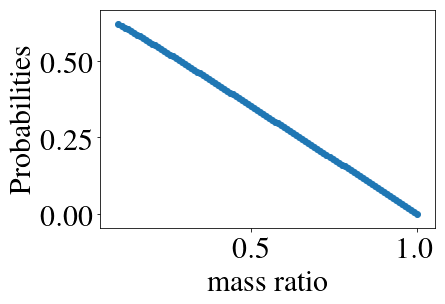

integrated_P 0.2845706994772613


In [548]:

mass_ratios = np.linspace(0.1, 1.0, 100)
probabilities = Prob(P=P_RL(m1=100*u.Msun, q=mass_ratios, R =1e3*u.Rsun).value, q=mass_ratios, fbin=0.7 )
print(probabilities)

plt.scatter(mass_ratios, probabilities)
plt.xlabel('mass ratio')
plt.ylabel('Probabilities')
plt.show()

integrated_P = np.trapz(probabilities, x=mass_ratios, dx = 0.01)

print('integrated_P', integrated_P)

integrated_P_q 0.44999999999999996


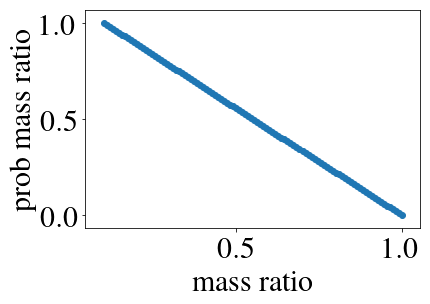

In [559]:
mass_ratios = np.linspace(0.1, 1.0, 100)

P_q = (1. -mass_ratios)/0.9

integrated_P_q = np.trapz(P_q, x=mass_ratios, dx = 0.01)
print('integrated_P_q', integrated_P_q)

plt.scatter(mass_ratios,P_q )
plt.xlabel('mass ratio')
plt.ylabel('prob mass ratio')
plt.show()

/Users/lieke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


integrated_P_P 0.44999999999999996
integrated_P_P 0.44999999999999996
integrated_P_P 0.44999999999999996
integrated_P_P 0.44999999999999996
integrated_P_P 0.44999999999999996
integrated_P_P 0.44999999999999996


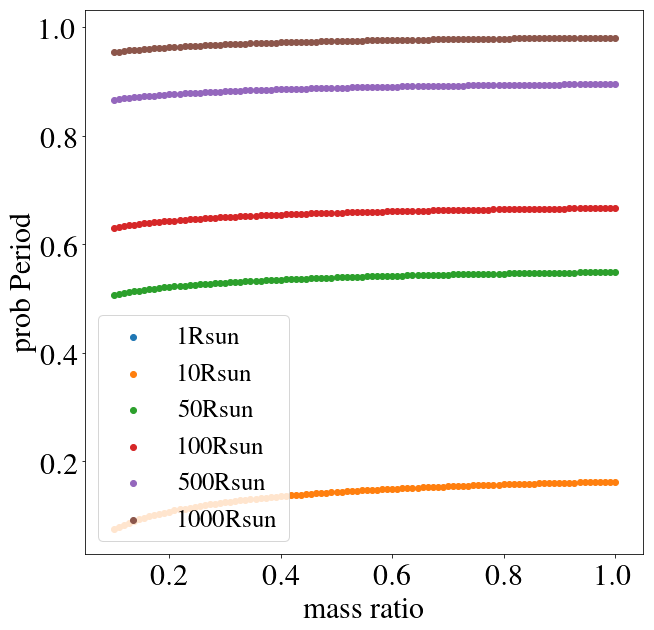

In [673]:
fig, ax = plt.subplots(figsize = (10,10) )
for rad in [1, 10, 50, 100, 500, 1000]:
    P_res=P_RL(m1=20*u.Msun, q=mass_ratios, R =rad*u.Rsun)
    lnP = np.log(P_res.value)     
    P_P = (np.sqrt(lnP) - np.sqrt(np.log(10**0.15)) )/( np.sqrt(np.log(10**3.5) ) - np.sqrt(np.log(10**0.15) ) )

    integrated_P_P = np.trapz(P_P, x=mass_ratios, dx = 1.)
    print('integrated_P_P', integrated_P_q)

    plt.scatter(mass_ratios,P_P , label = str(rad) +'Rsun')
plt.xlabel('mass ratio')
plt.ylabel('prob Period')
# plt.yscale('log')
plt.legend()
plt.show()


/Users/lieke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


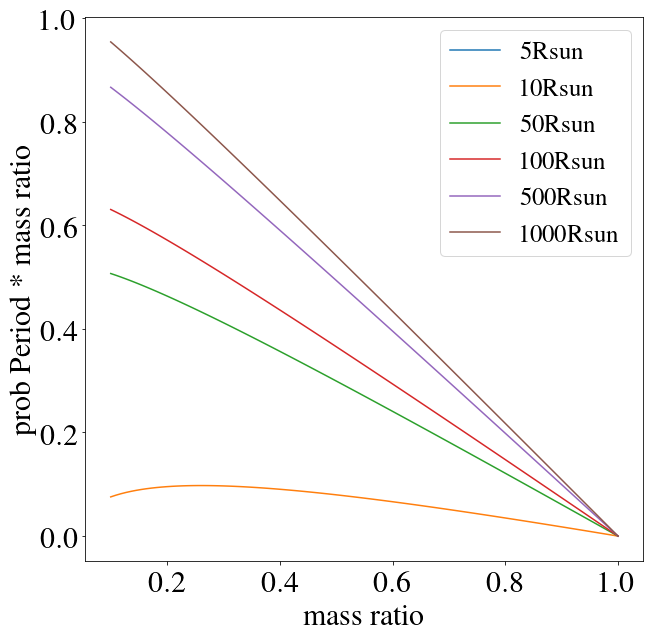

integrated_P_P 0.44999999999999996


In [668]:
mass_ratios = np.linspace(0.1, 1.0, 100)
P_q = (1. -mass_ratios)/0.9

fig, ax = plt.subplots(figsize = (10,10) )
for rad in [5, 10, 50, 100, 500, 1000]:
    P_res=P_RL(m1=20*u.Msun, q=mass_ratios, R =rad*u.Rsun)
    lnP = np.log(P_res.value)     
    P_P = (np.sqrt(lnP) - np.sqrt(np.log(10**0.15)) )/( np.sqrt(np.log(10**3.5) ) - np.sqrt(np.log(10**0.15) ) )

    plt.plot(mass_ratios,P_P* P_q, label = str(rad) +'Rsun')
plt.xlabel('mass ratio')
plt.ylabel('prob Period * mass ratio')
plt.legend()
plt.show()

integrated_P_P = np.trapz(P_P* P_q, x=mass_ratios, dx = 1.)
print('integrated_P_P', integrated_P_q)
